## listing_nbhd.zip 
> https://drive.google.com/file/d/1RXzoFit_B0UQJcg_xo29pm1619wTgTE2/view?usp=sharing

>contains counts of venues around the r-km neighbourhood around each listing, r=0.125,0.25,0.5,1,2,4

## venues_count.csv 
>https://drive.google.com/file/d/1VcgnE5O0lRUJ8SqZBfIKH5bR9Z_YGXJw/view?usp=sharing

>count the total number of each type of venues in a sorted order

In [ ]:
# download to the current directory

!gdown --id 1RXzoFit_B0UQJcg_xo29pm1619wTgTE2 -O listings_nbhd.zip
!unzip *.zip

!gdown --id 1VcgnE5O0lRUJ8SqZBfIKH5bR9Z_YGXJw -O venues_count.csv

Downloading...
From: https://drive.google.com/uc?id=1RXzoFit_B0UQJcg_xo29pm1619wTgTE2
To: /content/listings_nbhd.zip
25.0MB [00:00, 68.7MB/s]
Archive:  listings_nbhd.zip
  inflating: listings_0.125-km_nbhd.csv  
  inflating: listings_0.25-km_nbhd.csv  
  inflating: listings_0.5-km_nbhd.csv  
  inflating: listings_1-km_nbhd.csv  
  inflating: listings_2-km_nbhd.csv  
  inflating: listings_4-km_nbhd.csv  
Downloading...
From: https://drive.google.com/uc?id=1VcgnE5O0lRUJ8SqZBfIKH5bR9Z_YGXJw
To: /content/venues_count.csv
100% 1.53k/1.53k [00:00<00:00, 2.74MB/s]


In [ ]:
## original dataset, not needed 
!gdown --id 1ecgxSTxCmhCvVTSFgUBRGVjyGf3rLREW -O dataset.zip
!unzip dataset.zip
!gzip -dk Datasets/*.gz

Downloading...
From: https://drive.google.com/uc?id=1ecgxSTxCmhCvVTSFgUBRGVjyGf3rLREW
To: /content/dataset.zip
69.1MB [00:01, 64.8MB/s]
Archive:  dataset.zip
  inflating: Datasets/econ_state.csv  
  inflating: Datasets/demographics.csv  
  inflating: Datasets/venues.csv.gz  
  inflating: Datasets/real_estate.csv.gz  
  inflating: Datasets/listings.csv   
  inflating: Datasets/calendar.csv.gz  


In [ ]:
!pip install dataprep

     |████████████████████████████████| 1.8MB 5.1MB/s 
     |████████████████████████████████| 368kB 38.4MB/s 
     |████████████████████████████████| 10.1MB 35.8MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 1.3MB 33.1MB/s 
     |████████████████████████████████| 849kB 37.3MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 1.5MB 38.7MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 727kB 25.0MB/s 
     |████████████████████████████████| 747kB 18.6MB/s 
     |████████████████████████████████| 296kB 37.3MB/s 
     |████████████████████████████████| 143kB 43.7MB/s 
     |████████████████████████████████| 122kB 46.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-cp37-none-any.whl size=13918 sha256=4aa42b19b2e829ea0dfd5faf15bb406fee48345c398f3725cac6c0c706d0f88c
  Stored in 

In [ ]:
import pandas as pd
from dataprep.eda import create_report,plot_correlation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def getNonSingleton(df):
  return df[df['num_venues']>1]

In [ ]:
r=[0.125,0.25,0.5,1,2,4]
dfs={}
for i in r:
  dfs[i]=pd.read_csv(f'listings_{i}-km_nbhd.csv')
  # getNonSingleton(dfs[i]).to_csv(f'listings_{i}-km_nbhd_filtered.csv')
# create_report(df).save('listing_nbhd')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## look at the struture of dfs

In [ ]:
dfs.keys() # distance to listings

dict_keys([0.125, 0.25, 0.5, 1, 2, 4])

In [ ]:
dfs[0.5]

,listing_id,occupancy rate,price,latitude,longitude,neighbourhood,metropolitan,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,book_store,bowling_alley,bus_station,cafe,campground,car_dealer,car_rental,car_repair,car_wash,casino,cemetery,church,city_hall,clothing_store,convenience_store,courthouse,dentist,department_store,doctor,electrician,electronics_store,embassy,...,movie_theater,moving_company,museum,natural_feature,neighborhood,night_club,painter,park,parking,pet_store,pharmacy,physiotherapist,place_of_worship,plumber,point_of_interest,police,political,post_office,premise,real_estate_agency,restaurant,roofing_contractor,rv_park,school,shoe_store,shopping_mall,spa,stadium,storage,store,subpremise,subway_station,synagogue,train_station,transit_station,travel_agency,university,veterinary_care,zoo,num_venues
0,109,0.000000,NaN,33.982095,-118.384935,Culver City,los-angeles,0,1,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,2,0,0,0,0,0,2,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0,1,0,0,0,39,0,0,0,0,0,2,0,0,0,0,0,1,0,0,22,0,0,0,0,8,0,0,0,0,145
1,344,0.000000,NaN,34.165616,-118.334582,Burbank,los-angeles,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,27
2,941,0.400248,106.558666,34.071556,-118.350786,Fairfax,los-angeles,0,0,0,0,3,0,1,0,0,2,0,0,0,11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,31,0,0,0,0,0,3,0,0,0,0,1,2,0,0,3,0,0,0,0,12,1,0,0,0,120
3,2404,1.000000,85.000000,33.984640,-118.440064,Del Rey,los-angeles,0,0,0,0,0,0,5,0,6,8,0,1,0,13,6,0,3,2,5,0,0,0,0,0,3,2,0,0,0,3,0,6,0,...,0,1,1,0,0,0,1,0,0,0,5,0,0,0,155,0,0,0,0,2,28,0,0,1,2,1,12,0,1,89,0,0,0,0,14,5,0,1,0,652
4,2732,1.000000,145.000000,34.004750,-118.481266,Santa Monica,los-angeles,0,0,0,0,7,0,1,0,9,4,3,0,0,17,7,0,1,0,1,0,0,0,0,0,16,1,0,0,0,0,0,2,0,...,0,0,2,0,0,0,0,5,0,0,0,0,0,0,140,0,0,0,0,0,24,0,0,0,5,2,5,0,0,71,1,0,0,0,17,4,0,0,0,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50254,19034190,0.341154,154.218056,29.974433,-90.068229,Seventh Ward,new-orleans,0,1,0,0,2,0,0,0,7,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,0,1,0,0,0,75,0,0,0,1,0,10,0,0,0,0,1,0,0,0,20,0,0,0,0,29,0,0,0,0,281
50255,19035492,0.338941,67.904790,29.972830,-90.056200,St. Roch,new-orleans,0,0,0,0,5,0,0,0,9,0,0,0,0,21,2,0,2,0,4,0,0,0,0,0,6,4,0,0,0,0,0,2,0,...,0,0,1,0,0,2,1,3,0,0,5,0,0,0,102,0,0,0,1,0,7,0,0,0,1,1,0,0,0,42,0,0,0,0,29,1,0,0,0,390
50256,19035679,0.982117,91.751668,30.017616,-89.993928,Plum Orchard,new-orleans,0,0,0,0,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7,0,0,0,0,5,0,0,0,0,56
50257,19037230,0.257369,90.486667,29.923243,-90.118153,Audubon,new-orleans,0,1,0,0,3,0,3,0,2,4,0,0,0,8,8,0,0,0,0,0,0,0,0,0,23,1,0,0,0,1,0,2,0,...,0,1,0,0,0,0,0,0,0,0,2,0,0,0,94,0,0,0,0,0,9,0,0,0,4,2,5,0,0,59,0,0,0,0,12,1,0,0,0,401


Add columns for number of multiple listings under the host's id and part of multiple listings column

In [ ]:
listings_df = pd.read_csv('Datasets/listings.csv')

#Add a column detailing how many listings under host_id
#create a dictionary of ids
id_grouping = listings_df.groupby('host_id').count().sort_values('accommodates', ascending = False).iloc[:,:1]
id_grouping.reset_index(level = 0, inplace =True)
id_dict = dict(zip(id_grouping.host_id,id_grouping.accommodates))

#map dictionary to new dataframe column
listings_df['No_properties_under_id'] = listings_df['host_id'].map(id_dict)

In [ ]:
#Adding listings_under_host_id column to each of the km venue dfs that notes how many properties the host owns

# create a dictionary of ids

listing_id_dict = dict(zip(listings_df.id,listings_df.No_properties_under_id))

for i in r:
  dfs[i]['listings_under_host_id'] = dfs[i]['listing_id'].map(listing_id_dict)

In [ ]:
#add multiple_listing column
for i in r:
  dfs[i].loc[dfs[i]['listings_under_host_id']==1, 'multiple_listing'] = 0
  dfs[i].loc[dfs[i]['listings_under_host_id']>1, 'multiple_listing'] = 1

In [ ]:
#add multiple_listing columns for 2-5_listings, 6-10_listings, 11+_listings
for i in r:
  dfs[i].loc[(dfs[i]['listings_under_host_id']>1)&
             (dfs[i]['listings_under_host_id']<6), '2-5_listings'] = 1
  dfs[i].loc[(dfs[i]['listings_under_host_id']==1)|
             (dfs[i]['listings_under_host_id']>5), '2-5_listings'] = 0
  dfs[i].loc[(dfs[i]['listings_under_host_id']>5)&
             (dfs[i]['listings_under_host_id']<11), '6-10_listings'] = 1
  dfs[i].loc[(dfs[i]['listings_under_host_id']<6)|
             (dfs[i]['listings_under_host_id']>10), '6-10_listings'] = 0
  dfs[i].loc[dfs[i]['listings_under_host_id']>10, '11+_listings'] = 1
  dfs[i].loc[dfs[i]['listings_under_host_id']<11, '11+_listings'] = 0

In [ ]:
dfs[0.25]

,listing_id,occupancy rate,price,latitude,longitude,neighbourhood,metropolitan,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,book_store,bowling_alley,bus_station,cafe,campground,car_dealer,car_rental,car_repair,car_wash,casino,cemetery,church,city_hall,clothing_store,convenience_store,courthouse,dentist,department_store,doctor,electrician,electronics_store,embassy,...,night_club,painter,park,parking,pet_store,pharmacy,physiotherapist,place_of_worship,plumber,point_of_interest,police,political,post_office,premise,real_estate_agency,restaurant,roofing_contractor,rv_park,school,shoe_store,shopping_mall,spa,stadium,storage,store,subpremise,subway_station,synagogue,train_station,transit_station,travel_agency,university,veterinary_care,zoo,num_venues,listings_under_host_id,multiple_listing,2-5_listings,6-10_listings,11+_listings
0,109,0.000000,NaN,33.982095,-118.384935,Culver City,los-angeles,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,32,1,0.0,0.0,0.0,0.0
1,344,0.000000,NaN,34.165616,-118.334582,Burbank,los-angeles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0
2,941,0.400248,106.558666,34.071556,-118.350786,Fairfax,los-angeles,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,24,1,0.0,0.0,0.0,0.0
3,2404,1.000000,85.000000,33.984640,-118.440064,Del Rey,los-angeles,0,0,0,0,0,0,1,0,1,2,0,0,0,1,2,0,1,0,2,0,0,0,0,0,2,1,0,0,0,0,0,3,0,...,0,1,0,0,0,1,0,0,0,49,0,0,0,0,2,13,0,0,0,2,0,1,0,1,32,0,0,0,0,1,2,0,0,0,210,1,0.0,0.0,0.0,0.0
4,2732,1.000000,145.000000,34.004750,-118.481266,Santa Monica,los-angeles,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,6,0,0,0,0,37,2,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50254,19034190,0.341154,154.218056,29.974433,-90.068229,Seventh Ward,new-orleans,0,0,0,0,0,0,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,5,0,0,0,0,43,2,1.0,1.0,0.0,0.0
50255,19035492,0.338941,67.904790,29.972830,-90.056200,St. Roch,new-orleans,0,0,0,0,1,0,0,0,1,0,0,0,0,7,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,27,0,0,0,0,0,2,0,0,0,0,0,0,0,0,14,0,0,0,0,9,0,0,0,0,104,2,1.0,1.0,0.0,0.0
50256,19035679,0.982117,91.751668,30.017616,-89.993928,Plum Orchard,new-orleans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0.0,0.0,0.0,0.0
50257,19037230,0.257369,90.486667,29.923243,-90.118153,Audubon,new-orleans,0,1,0,0,1,0,1,0,2,1,0,0,0,3,4,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,30,0,0,0,0,0,4,0,0,0,0,1,1,0,0,16,0,0,0,0,5,0,0,0,0,128,1,0.0,0.0,0.0,0.0


## look at the structure of venue

In [ ]:
venue_df=pd.read_csv('venues_count.csv',index_col=0)
venue_df.iloc[2:15,:]

,Count
store,55114
food,31473
transit_station,24487
restaurant,21817
bus_station,19618
home_goods_store,8066
health,6946
clothing_store,6364
bar,4734
lodging,3989


## plotting the density

In [ ]:
venueTypes=[*venue_df.index]
venueTypes[:6]

['point_of_interest',
 'establishment',
 'store',
 'food',
 'transit_station',
 'restaurant']

In [ ]:
venuesToPlot=(venueTypes[:6]+['num_venues'])

In [ ]:
venuesToPlot

['point_of_interest',
 'establishment',
 'store',
 'food',
 'transit_station',
 'restaurant',
 'num_venues']

In [ ]:
# DON't RUN THIS - COLAB will crash

# # @TODO the density at each radius i is not independent
# # It's just the average in the circle, which includes also the smaller circle
# # Fix it? or acceptable?
# #r=[0.125,0.25,0.5,1,2,4]
# dfs2 = []
# for i in r:
#   dfs2.append(dfs[i])

# for venue_type in venuesToPlot:
#   pd.concat({i: (getNonSingleton(dfs2[i])[venue_type]-getNonSingleton(dfs2[i-1]))/(3.14*r[i]*r[i]-3.14*(r[i-1])*(r[i-1])) for i in range(1,4)},axis=1).boxplot(showfliers=False)
#   plt.title(venue_type)
#   plt.xlabel('distance to listing (km)')
#   plt.ylabel('Density')
#   plt.show()

# #len(dfs2)

In [ ]:
# @TODO the density at each radius i is not independent
# It's just the average in the circle, which includes also the smaller circle
# Fix it? or acceptable?

for venue_type in venuesToPlot:
  pd.concat({i: getNonSingleton(dfs[i])[venue_type]/(3.14*i*i) for i in r},axis=1).boxplot(showfliers=False)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Density')
  plt.show()


In [ ]:
#same as above for multiple listings
for venue_type in venuesToPlot:
  pd.concat({i: getNonSingleton(dfs[i][dfs[i]['multiple_listing']==1])[venue_type]/(3.14*i*i) for i in r},axis=1).boxplot(showfliers=False)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Density')
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


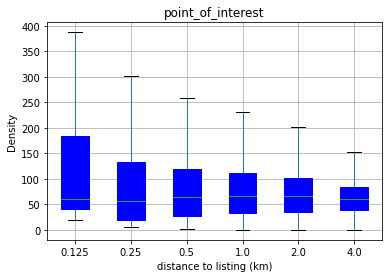

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


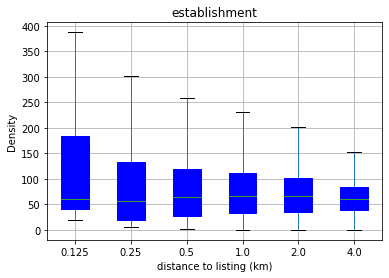

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


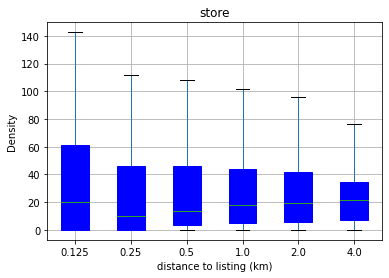

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


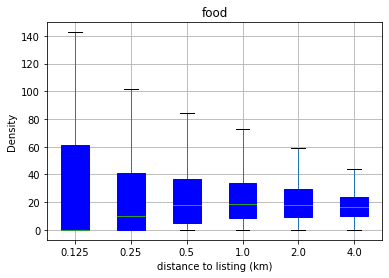

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


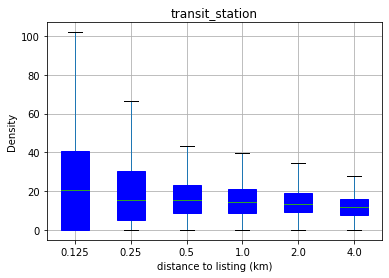

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


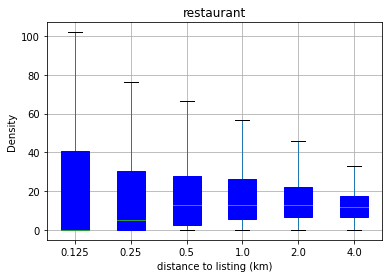

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


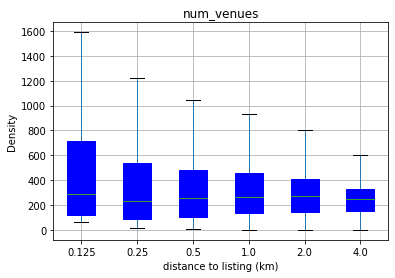

In [ ]:
#same for single listings
for venue_type in venuesToPlot:
  scheme = dict(boxes="Blue")
  pd.concat({i: getNonSingleton(dfs[i][dfs[i]['multiple_listing']==0])[venue_type]/(3.14*i*i) for i in r},axis=1).boxplot(showfliers=False,color=scheme,patch_artist=True)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Density')
  plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


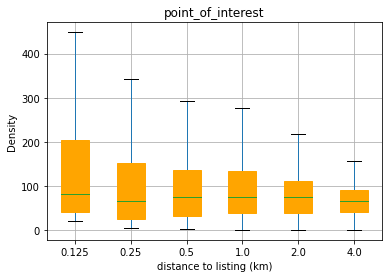

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


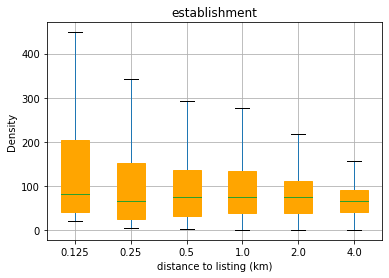

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


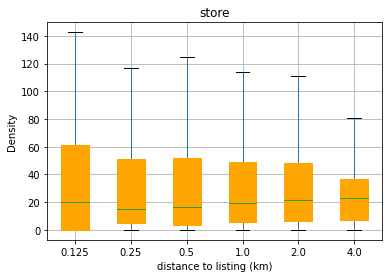

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


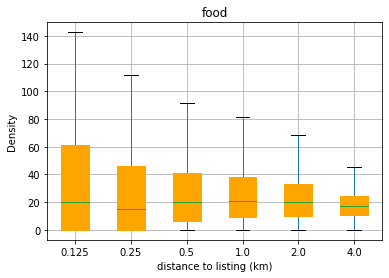

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


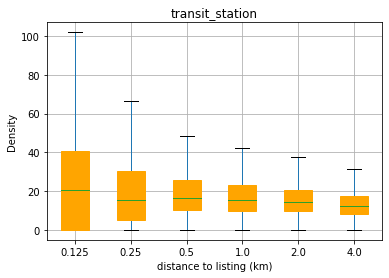

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


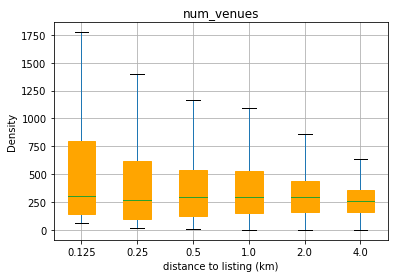

In [ ]:
#same for 2-5_listings
scheme = dict(boxes="Orange")
for venue_type in venuesToPlot:
  pd.concat({i: getNonSingleton(dfs[i][dfs[i]['2-5_listings']==1])[venue_type]/(3.14*i*i) for i in r},axis=1).boxplot(showfliers=False,color=scheme,patch_artist=True)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Density')
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


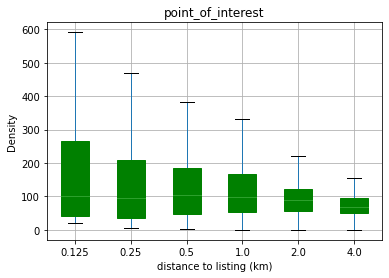

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


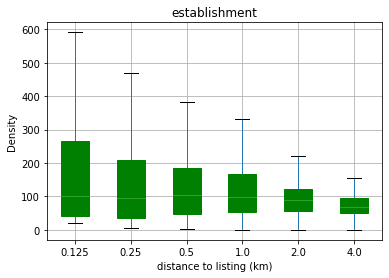

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


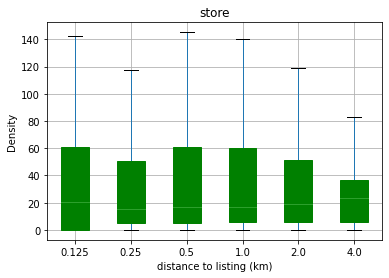

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


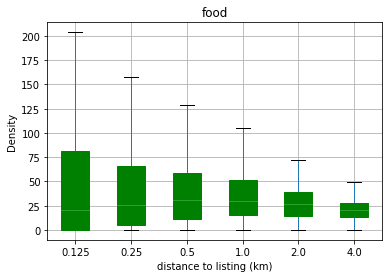

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


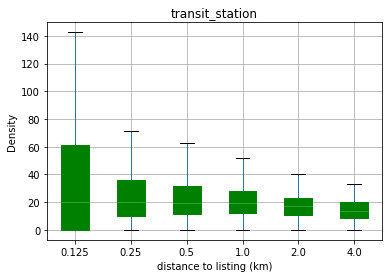

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


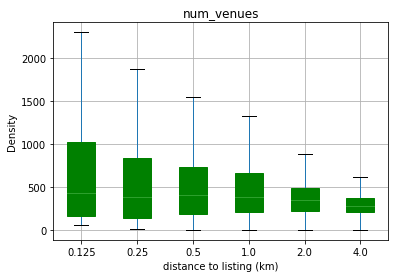

In [ ]:
#same for 6-10_listings
scheme = dict(boxes="Green")
for venue_type in venuesToPlot:
  pd.concat({i: getNonSingleton(dfs[i][dfs[i]['6-10_listings']==1])[venue_type]/(3.14*i*i) for i in r},axis=1).boxplot(showfliers=False,color=scheme,patch_artist=True)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Density')
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


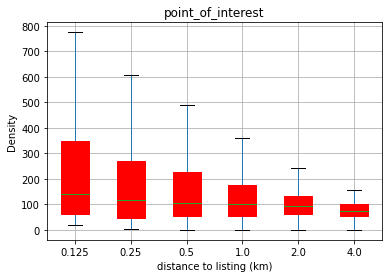

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


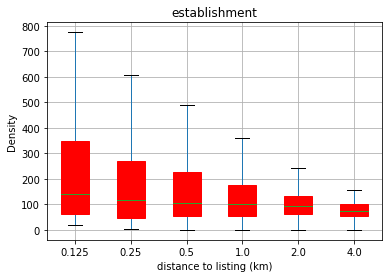

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


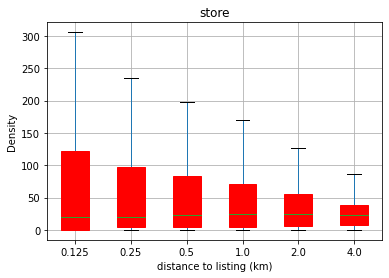

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


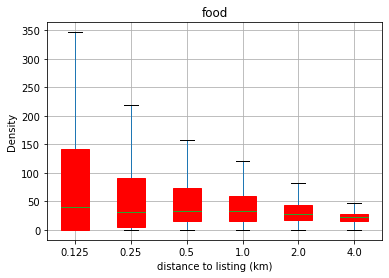

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


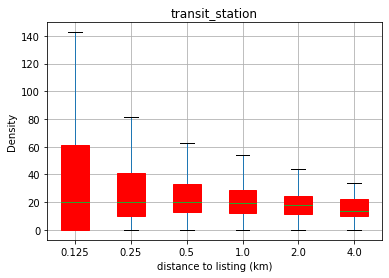

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


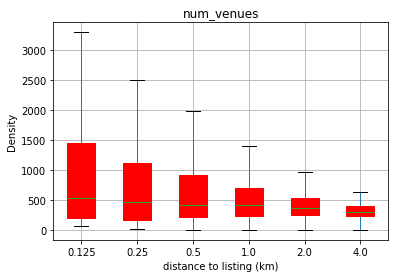

In [ ]:
#same for 11+_listings
scheme = dict(boxes="Red")
for venue_type in venuesToPlot:
  pd.concat({i: getNonSingleton(dfs[i][dfs[i]['11+_listings']==1])[venue_type]/(3.14*i*i) for i in r},axis=1).boxplot(showfliers=False,color=scheme,patch_artist=True)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Density')
  plt.show()

## Plotting the counts

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


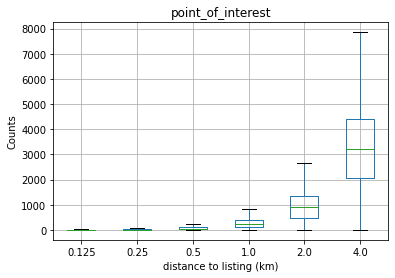

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


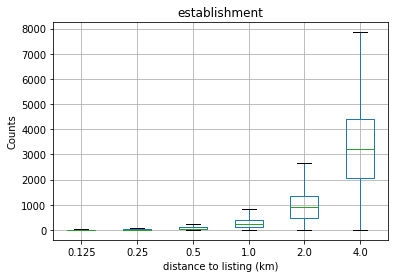

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


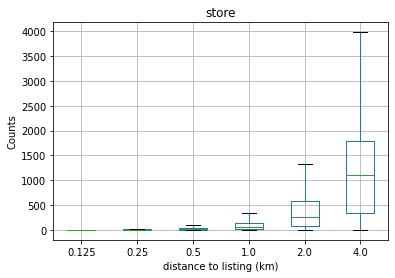

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


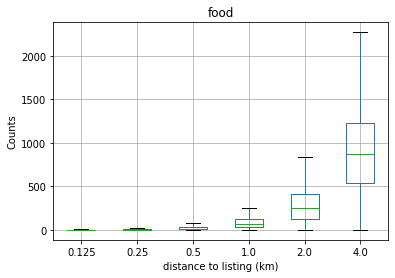

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


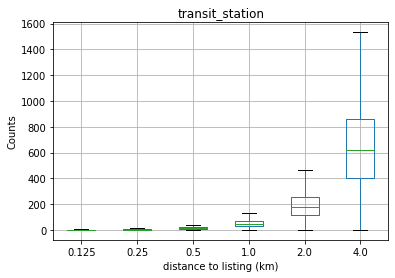

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


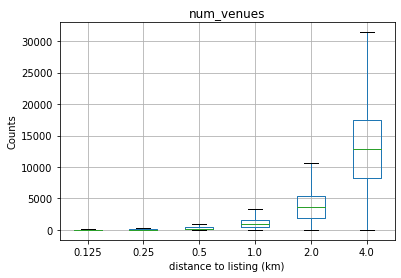

In [ ]:
for venue_type in venuesToPlot:
  pd.concat({i: getNonSingleton(dfs[i])[venue_type] for i in r},axis=1).boxplot(showfliers=False)
  plt.title(venue_type)
  plt.xlabel('distance to listing (km)')
  plt.ylabel('Counts')
  plt.show()

# Correlation Analysis

In [ ]:
!pip install dataprep -q
from dataprep.eda import compute_correlation

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


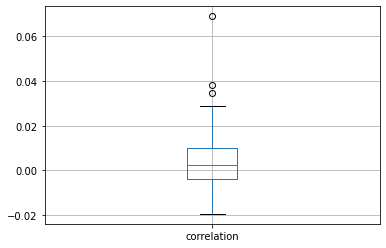

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


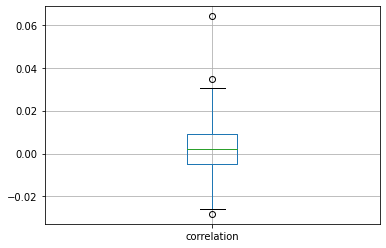

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


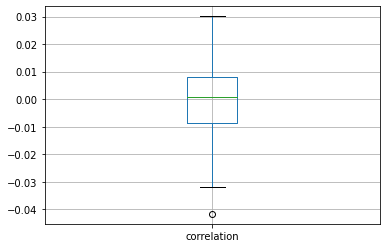

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


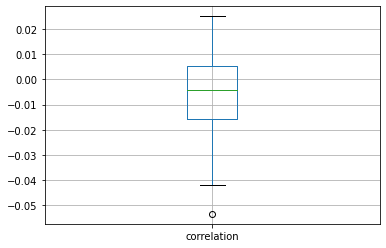

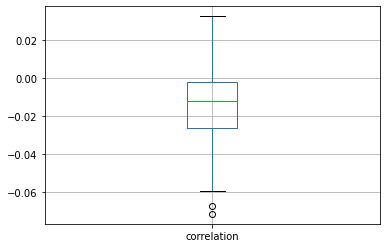

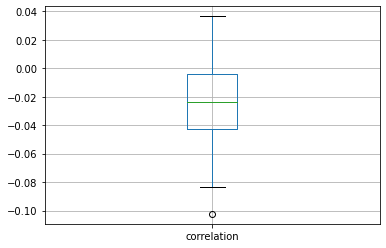

In [ ]:
for i in r:
  cor=compute_correlation(getNonSingleton(dfs[i][['occupancy rate', 'price']+list(df.columns[-101:])]),'occupancy rate' )
  cor['data']['Pearson'].sort_values('correlation').boxplot()
  plt.show()

In [ ]:
cor['data']['Pearson'].sort_values('correlation')

,x,y,correlation
0,occupancy rate,park,-0.102366
1,occupancy rate,atm,-0.083715
2,occupancy rate,gas_station,-0.081601
3,occupancy rate,library,-0.073052
4,occupancy rate,meal_takeaway,-0.071127
...,...,...,...
97,occupancy rate,price,0.015636
98,occupancy rate,casino,0.018200
99,occupancy rate,dentist,0.020561
100,occupancy rate,subpremise,0.031480


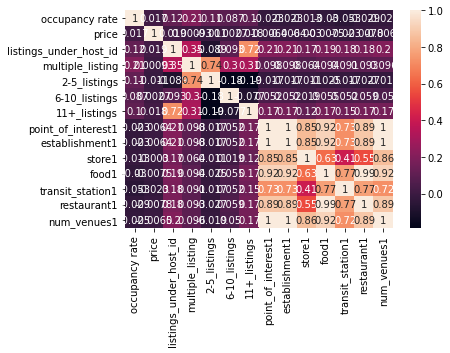

In [ ]:
##New bit Correlation matrix
columns_wanted1 = ['occupancy rate', 'price','listings_under_host_id','multiple_listing','2-5_listings','6-10_listings','11+_listings']
columns_wanted2 = ['point_of_interest','establishment','store','food','transit_station','restaurant','num_venues']
columns_wanted3 = {'point_of_interest':f'point_of_interest{i}','establishment':f'establishment{i}','store':f'store{i}','food':f'food{i}','transit_station':f'transit_station{i}','restaurant':f'restaurant{i}','num_venues':f'num_venues{i}'}

#make new df
# for i in r:
# columns_wanted = 
pre_corr = [dfs[0.25].loc[:,columns_wanted1]]

i=0.5
pre_corr.append(dfs[i].loc[:,columns_wanted2].rename(columns=columns_wanted3))

pre_corr1 = pd.concat(pre_corr, axis=1)
corr = pre_corr1.corr()

sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
r

[0.125, 0.25, 0.5, 1, 2, 4]